In [7]:
# STEP 1 — Libraries import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
# STEP 2 — Dataset load
data = pd.read_csv('student.csv')
print(data.head())
print(data.info())


   Study Hours  Attendance  Prev Score  Final Score
0            2          99          76        336.5
1            3          57          63        280.5
2            7          21          83        166.5
3            6          72          99        168.0
4            9          64          43        188.0
<class 'pandas.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Study Hours  100 non-null    int64  
 1   Attendance   100 non-null    int64  
 2   Prev Score   100 non-null    int64  
 3   Final Score  100 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 3.3 KB
None


       Study Hours  Attendance  Prev Score  Final Score
count   100.000000  100.000000  100.000000   100.000000
mean     20.140000   62.460000   45.230000   183.035000
std      13.928403   24.830911   22.538342    60.682368
min       0.000000   10.000000    5.000000    37.000000
25%       7.000000   45.000000   28.000000   139.625000
50%      18.500000   65.000000   44.000000   178.750000
75%      31.250000   84.000000   63.000000   217.375000
max      48.000000  100.000000   99.000000   336.500000
Study Hours    0
Attendance     0
Prev Score     0
Final Score    0
dtype: int64
             Study Hours  Attendance  Prev Score  Final Score
Study Hours     1.000000    0.043270   -0.085243     0.369468
Attendance      0.043270    1.000000    0.030456     0.278015
Prev Score     -0.085243    0.030456    1.000000     0.370843
Final Score     0.369468    0.278015    0.370843     1.000000


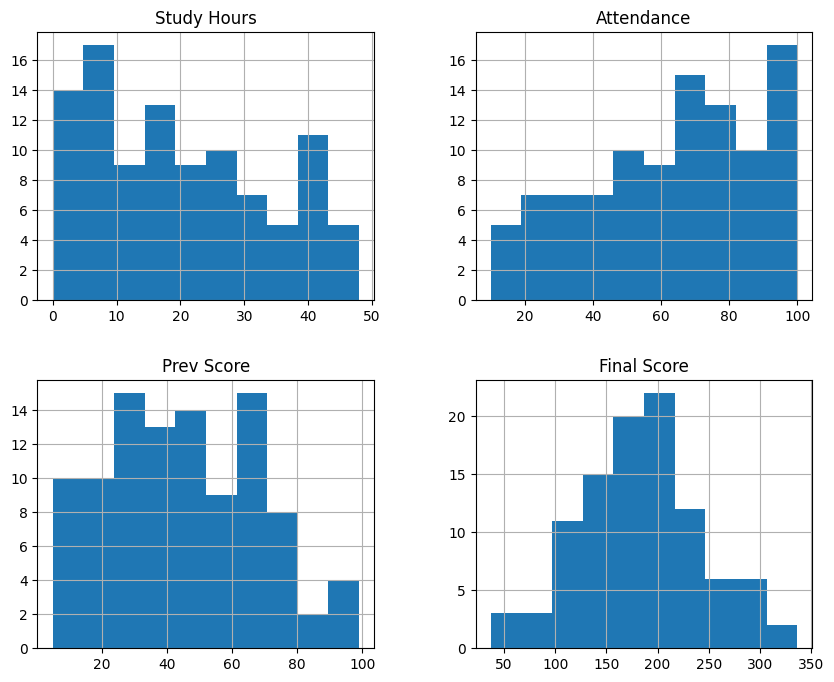

In [9]:
# STEP 3 — EDA
print(data.describe())
print(data.isnull().sum())
print(data.corr())
data.hist(figsize=(10,8))
plt.show()


Slope: 1.6096764351214512
Intercept: 150.61611659665397


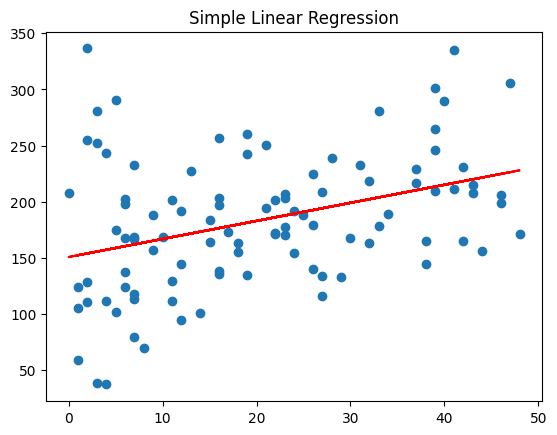

In [10]:
# SIMPLE LINEAR REGRESSION
x = data['Study Hours'].values
y = data['Final Score'].values
x_mean = np.mean(x)
y_mean = np.mean(y)
b1 = np.sum((x-x_mean)*(y-y_mean)) / np.sum((x-x_mean)**2)
b0 = y_mean - b1*x_mean
print('Slope:', b1)
print('Intercept:', b0)
y_pred_simple = b0 + b1*x
plt.scatter(x,y)
plt.plot(x,y_pred_simple,color='red')
plt.title('Simple Linear Regression')
plt.show()


Coefficients: [62.28263615  1.71007982  0.60838644  1.06813042]


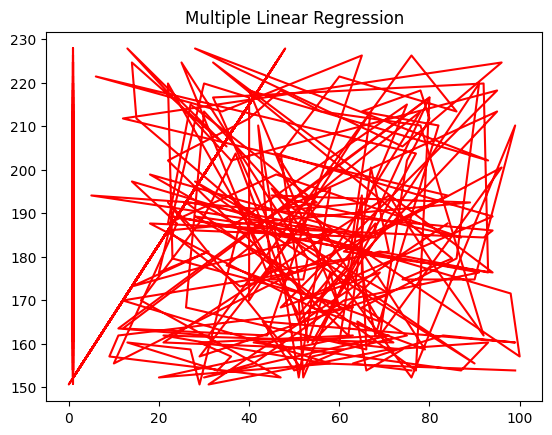

In [ ]:
# MULTIPLE LINEAR REGRESSION
X = data[['Study Hours','Attendance','Prev Score']].values
y = data['Final Score'].values
X_b = np.c_[np.ones((len(X),1)), X]
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print('Coefficients:', theta)
y_pred = X_b.dot(theta)


MSE: 2328.202247643052
RMSE: 48.25144814037245
R2: 0.3613535956086198


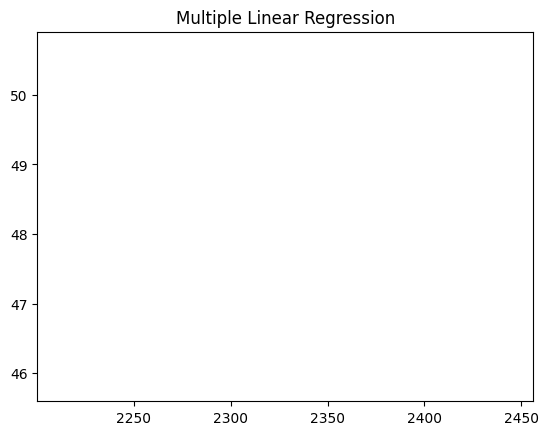

In [ ]:
# METRICS
def mse(y, pred):
    return np.mean((y-pred)**2)
def rmse(y, pred):
    return np.sqrt(mse(y,pred))
def r2(y,pred):
    ss_total = np.sum((y-np.mean(y))**2)
    ss_res = np.sum((y-pred)**2)
    return 1 - ss_res/ss_total
print('MSE:', mse(y,y_pred))
print('RMSE:', rmse(y,y_pred))
print('R2:', r2(y,y_pred))


In [25]:
# POLYNOMIAL
x_poly = data['Study Hours'].values
X_poly = np.c_[np.ones(len(x_poly)), x_poly, x_poly**2]
theta_poly = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)
y_pred_poly = X_poly.dot(theta_poly)
print('Polynomial R2:', r2(y,y_pred_poly))


Polynomial R2: 0.13894549311184767


In [14]:
# RIDGE
lam = 1
I = np.eye(X_b.shape[1])
theta_ridge = np.linalg.inv(X_b.T.dot(X_b)+lam*I).dot(X_b.T).dot(y)
print('Ridge coefficients:', theta_ridge)


Ridge coefficients: [54.89441873  1.77043953  0.66167857  1.11887113]


In [15]:
# LASSO
theta_lasso = np.zeros(X_b.shape[1])
lr = 0.0001
lam = 0.1
for _ in range(1000):
    pred = X_b.dot(theta_lasso)
    error = pred - y
    grad = X_b.T.dot(error)/len(y)
    theta_lasso -= lr*(grad + lam*np.sign(theta_lasso))
print('Lasso coefficients:', theta_lasso)


Lasso coefficients: [0.48679601 2.21530408 1.05401928 1.49253329]


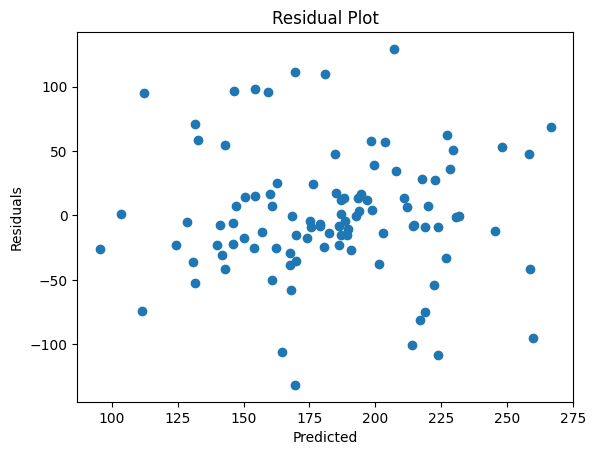

In [16]:
# RESIDUAL PLOT
residuals = y - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
